# Problem Statement

**Background Perusahaan**

Perusahaan ABC dikenal sebagai toko atau distributor besi yang melayani kebutuhan konstruksi dan industri. Sudah menjadi suplier terpercaya bagi banyak toko besi, toko bangunan, toko material, galangan kapal, dan berbagai proyek kontruksi maupun infrastruktur diseluruh Indonesia.

**Problem Description**

Menganalisis (segmentasi) pelanggan yang dimiliki berdasarkan data transaksi PT ABC menggunakan clustering berdasarkan variebl-variabel data yang diberikan (RFM, location, industry, product bought).

**Tujuan dari analisa**

a. Dapat menghasilkan segmentasi-segmentasi pelanggan dari data yang diberikan

b. Dapat memberikan rekomendasi yang actionable untuk segmentasi yang ditemukan

# Import and Load Dataset

In [1]:
# Import packages
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [5]:
# Load dataset 
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Penjualan_PT ABC.csv')

In [6]:
# Setting untuk menampilkan semua rows dan columns di dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
# Menampilkan data teratas
data.head()

,No. Faktur,Tgl Faktur,No. Pelanggan,City,Industry,No. Customer,No. Barang,Category,Kuantitas,Nilai HPP,Harga Jual,Margin
0,429dd***12120,2021-11-01,3056,Kota Ambon,NaN,2051,c685a76e,Aksesoris,30,1627800.00,2041818.18,414018.18
1,f82b3***2b330,2021-09-02,4169,Sidoarjo,Factory,1247,9dd33d34,As,9,1377000.00,2970000.20,1593000.20
2,2a10b***47139,2021-09-17,4169,Sidoarjo,Factory,1247,3f81ec81,As,5,1876756.20,2897273.00,1020516.80
3,8f4f1***4d0e1,2021-02-01,3050,Sidoarjo,Factory,2051,69a96587,As,28,17761363.64,20338182.01,2576818.37
4,d8b69***a516d,2021-09-27,3628,Sidoarjo,Universal,1247,94e04da3,As,1,683227.27,1051819.00,368591.73


In [8]:
# Cek type data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No. Faktur     2590 non-null   object 
 1   Tgl Faktur     2590 non-null   object 
 2   No. Pelanggan  2590 non-null   int64  
 3   City           2589 non-null   object 
 4   Industry       1755 non-null   object 
 5   No. Customer   2590 non-null   int64  
 6   No. Barang     2590 non-null   object 
 7   Category       2590 non-null   object 
 8   Kuantitas      2590 non-null   int64  
 9   Nilai HPP      2590 non-null   float64
 10  Harga Jual     2590 non-null   float64
 11  Margin         2590 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 242.9+ KB


# EDA 1

1. Kapan (hari,bulan,tahun) customer sering melakukan transaksi?

In [9]:
# Mengganti type data object menjadi datetime
data['Tgl Faktur']= pd.to_datetime(data['Tgl Faktur'])

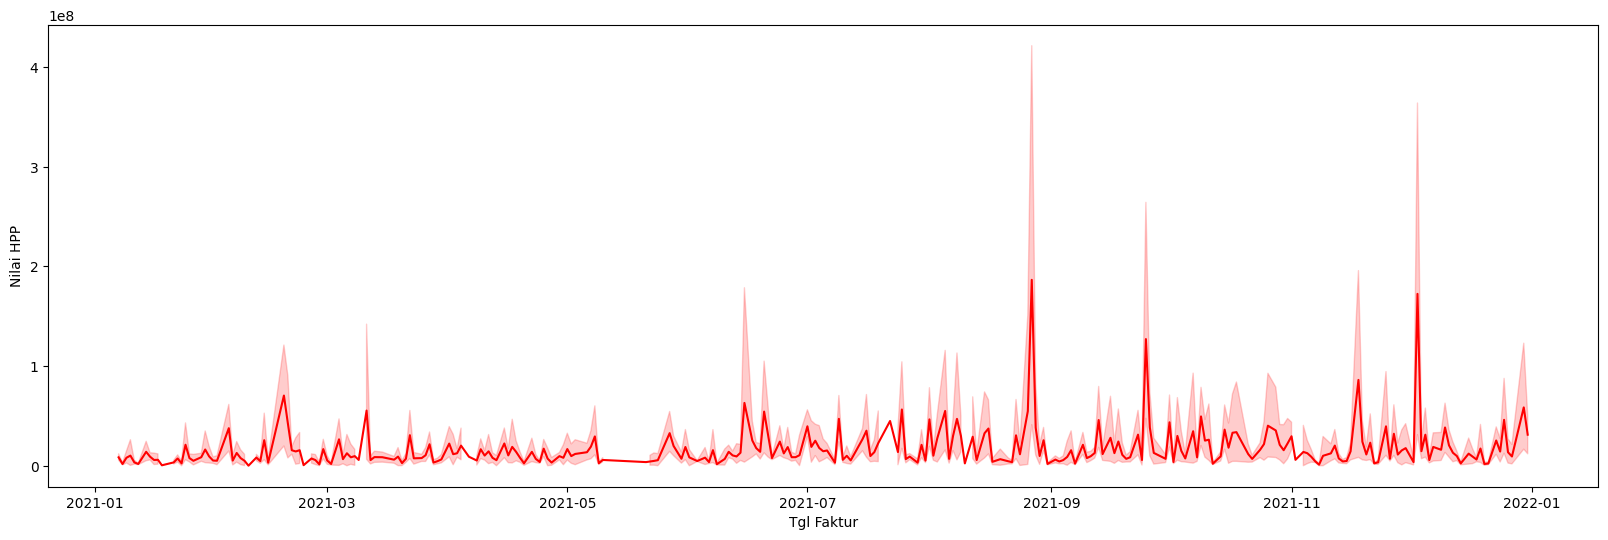

In [10]:
# Memvisualisaikan kolom tgl faktur dengan nlai hpp
plt.figure(figsize=(20, 6))
ax=sns.lineplot(data=data, x=data['Tgl Faktur'], y=data['Nilai HPP'], color='red')

Pada visualisasi antara tgl faktur dengan nilai hpp atau harga pokok penjualan, didapat bahwa transaksi dilakuakn pada bulan januari 2021 sampai januari 2023,
dengan kesimpulan nilai hpp mengalami fluktatif atau naik turun, kenaikan nilai hpp tertinggi pertama pada bulan februari akhir, namun setelah itu nilai hpp mengalami penurunan, hingga bulan akhir agustus mengalami kenaikan nilai hpp tertinggi yang signifikan/puncak kenaikan dan setelah itu nilai hpp mengalami penurunan kembali, hingga bulan oktober, akhir november dan bulan desember terjadi kenaikan nilai hpp disetiap tahunnya.


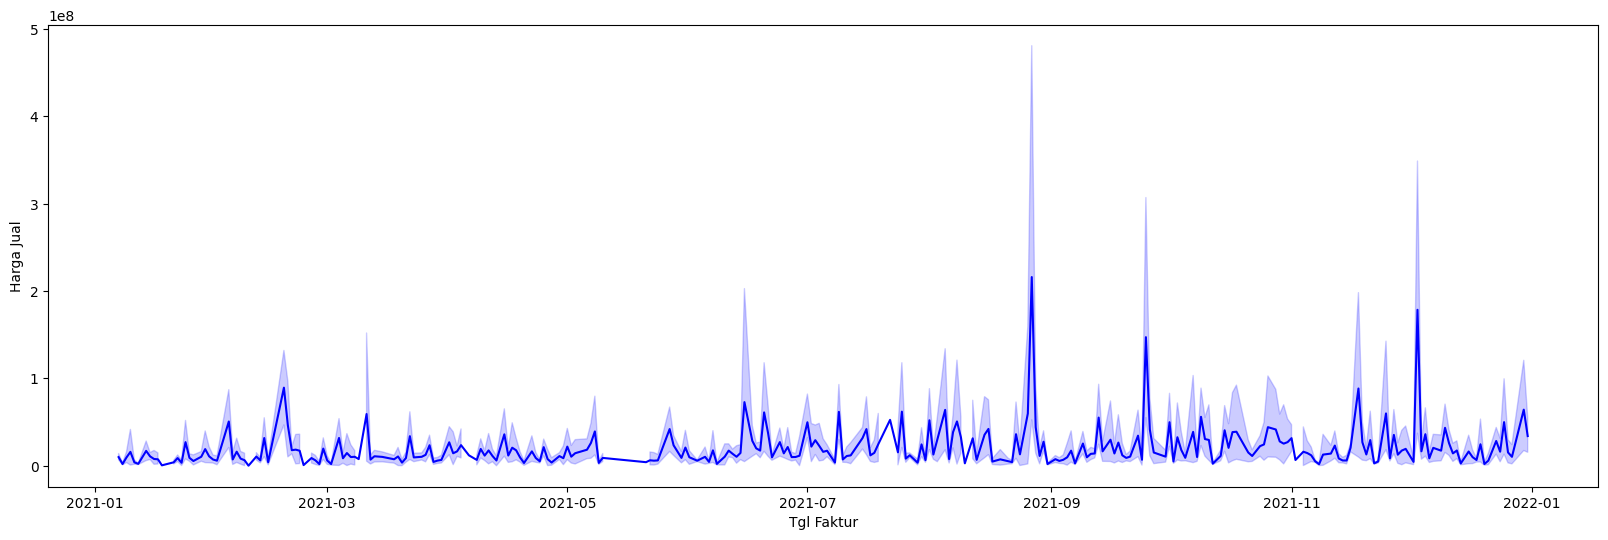

In [11]:
# Memvisualisaikan kolom tgl faktur dengan hrga jual
plt.figure(figsize=(20, 6))
sns.lineplot(data=data, x=data['Tgl Faktur'] , y=data['Harga Jual'], color='blue')
plt.show()

Untuk visualisasi antara tgl faktur dengan harga jual tidak jauh berbeda dengan kesimpulan dari vusalisai nilai hpp, dengan kenaikan harga jual tertinggi pertama terjadi pada bulan akhir februari dan puncak kenaikan tertinggi harga jual berada di akhir agustus

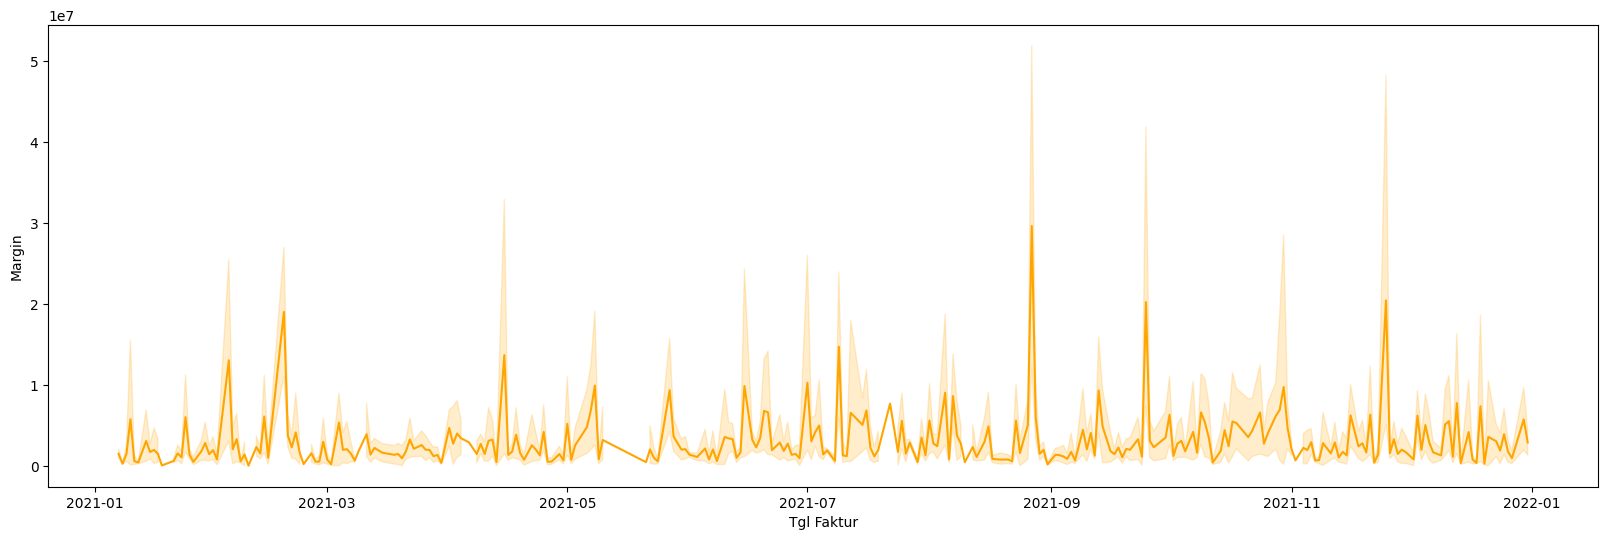

In [12]:
# Memvisualisaikan kolom tgl faktur dengan margin
plt.figure(figsize=(20, 6))
sns.lineplot(data=data, x=data['Tgl Faktur'], y=data['Margin'], color='orange')
plt.show()

Untuk visualisasi antara tgl faktur dengan margin tidak jauh berbeda dengan kesimpulan dari vusalisai nilai hpp dan harga jual, dengan lnepo yang fluktuatif. 

2. Dimanakah kota yang sering melakukan transaksi?

In [13]:
# Memperbaiki kata didalam kolom City    
for x in data.index:
  if data.loc[x, "City"] == ' Sidoarjo':
    data.loc[x, "City"] = 'Sidoarjo'
  elif data.loc[x, "City"] == 'Gresik':
    data.loc[x, "City"] = 'Kab. Gresik'
  elif data.loc[x, "City"] == 'Surabaya / Jawa Timur ':
    data.loc[x, "City"] = 'Surabaya'
  elif data.loc[x, "City"] == 'Kediri':
    data.loc[x, "City"] = 'Kab. Kediri'
  elif data.loc[x, "City"] == 'Sidoarjo/Jawa Timur ':
    data.loc[x, "City"] = 'Sidoarjo'
  elif data.loc[x, "City"] == 'Surabaya / Jawa Timur':
    data.loc[x, "City"] = 'Surabaya'
  elif data.loc[x, "City"] == 'Nagekeo':
    data.loc[x, "City"] = 'Kab. Nagekeo'
  elif data.loc[x, "City"] == ' Sidoarjo':
    data.loc[x, "City"] = 'Sidoarjo'
  elif data.loc[x, "City"] == 'Kab Gresik':
    data.loc[x, "City"] = 'Kab. Gresik'
  elif data.loc[x, "City"] == ' Gresik':
    data.loc[x, "City"] = 'Kab. Gresik'
  elif data.loc[x, "City"] == 'Surabaya Jawa Timur':
    data.loc[x, "City"] = 'Surabaya'
  elif data.loc[x, "City"] == ' Banyuwangi':
    data.loc[x, "City"] = 'Kab. Banyuwangi'
  elif data.loc[x, "City"] == 'Surabaya/Jawa Timur/60293':
    data.loc[x, "City"] = 'Surabaya'
  elif data.loc[x, "City"] == 'Surabaya/ Jawa Timur ':
    data.loc[x, "City"] = 'Surabaya'
  elif data.loc[x, "City"] == 'Kota Kediri/Jawa Timur':
    data.loc[x, "City"] = 'Kota Kediri'
  elif data.loc[x, "City"] == 'Kab Kediri':
    data.loc[x, "City"] = 'Kab. Kediri'
  elif data.loc[x, "City"] == 'Kab. Sidoarjo':
    data.loc[x, "City"] = 'Sidoarjo'
  elif data.loc[x, "City"] == 'Palu':
    data.loc[x, "City"] = 'Kota Palu'
  elif data.loc[x, "City"] == 'Pamekasan':
    data.loc[x, "City"] = 'Kab Pamekasan'
  elif data.loc[x, "City"] == ' Kab. Jepara':
    data.loc[x, "City"] = 'Kab. Jepara'
  elif data.loc[x, "City"] == 'Banyuwangi/ Jawa Timur':
    data.loc[x, "City"] = 'Kab. Banyuwangi'
  elif data.loc[x, "City"] == 'Banyuwangi':
    data.loc[x, "City"] = 'Kab. Banyuwangi'
  elif data.loc[x, "City"] == 'Sumenep. Jawa Timur':
    data.loc[x, "City"] = 'Sumenep'
  elif data.loc[x, "City"] == 'Bantul Diy 55188':
    data.loc[x, "City"] = 'Bantul'
  elif data.loc[x, "City"] == ' Tulungagung':
    data.loc[x, "City"] = 'Tulungagung'
  elif data.loc[x, "City"] == 'Malang Jawa Timur':
    data.loc[x, "City"] = 'Malang'
  elif data.loc[x, "City"] == ' Kota Balikpapan':
    data.loc[x, "City"] = 'Kota Balikpapan'
  elif data.loc[x, "City"] == 'Balikpapan. Kalimantan Timur ':
    data.loc[x, "City"] = 'Kota Balikpapan'
  elif data.loc[x, "City"] == 'Kota Jayapura ':
    data.loc[x, "City"] = 'Kota Jayapura'
  elif data.loc[x, "City"] == 'Balikpapan':
    data.loc[x, "City"] = 'Kota Balikpapan'
  elif data.loc[x, "City"] == 'Sorong':
    data.loc[x, "City"] = 'Kota Sorong'
  elif data.loc[x, "City"] == 'Lamongan':
    data.loc[x, "City"] = 'Kab. Lamongan'
  elif data.loc[x, "City"] == '66126':
    data.loc[x, "City"] = 'Kota Blitar'
  elif data.loc[x, "City"] == '99552 ':
    data.loc[x, "City"] = 'Kab. Jayawijaya'
  elif data.loc[x, "City"] == '65152':
    data.loc[x, "City"] = 'Malang'
  elif data.loc[x, "City"] == 'Denpasar ':
    data.loc[x, "City"] = 'Denpasar'
  elif data.loc[x, "City"] == 'Cilacap':
    data.loc[x, "City"] = 'Kab. Cilacap'
  elif data.loc[x, "City"] == 'Ende':
    data.loc[x, "City"] = 'Kab. Ende'
  elif data.loc[x, "City"] == 'Nganjuk':
    data.loc[x, "City"] = 'Kab. Nganjuk'
  elif data.loc[x, "City"] == 'Kab':
    data.loc[x, "City"] = 'Unknown'
  elif data.loc[x, "City"] == 'Jawa Barat':
    data.loc[x, "City"] = 'Unknown'

In [14]:
# Melihat 10 kota teratas yg melakukan transaksi
data['City'].value_counts().head(10)

Surabaya         1039
Sidoarjo          367
Kab. Gresik       115
Jayapura           62
Situbondo          51
Jakarta Pusat      39
Badung             37
Kota Kediri        35
Pasuruan           31
Jakarta Timur      31
Name: City, dtype: int64

In [15]:
# Melihat 10 kota terbawah yg melakukan transaksi
data['City'].value_counts().tail(10)

Blora                      1
Kab. Kotawaringin Barat    1
Samarinda                  1
Bogor                      1
Kota Blitar                1
Kudus                      1
Pacitan                    1
Berau                      1
Kab. Banjarnegara          1
Purwokerto                 1
Name: City, dtype: int64

Dari hasil diatas bisa didapat informasi bahwa surabaya merupakan daerah denagn persahaan yang sering melakukan transaksi dengan PT ABC diikuti dengan sidoarjo dan kab gresik di no 2 dan 3.
Sedangkan daerah dengan transasksi terendah seperti informsi diatas.

3. Industri manakah yang sering melakukan transaksi?

In [16]:
# Melihat jumlah jenis industri yang melakukan transaksi dengan PT ABC
data['Industry'].value_counts().head()

Universal          1008
Factory             381
Construction        349
Other Fabrikasi      16
Logistic              1
Name: Industry, dtype: int64

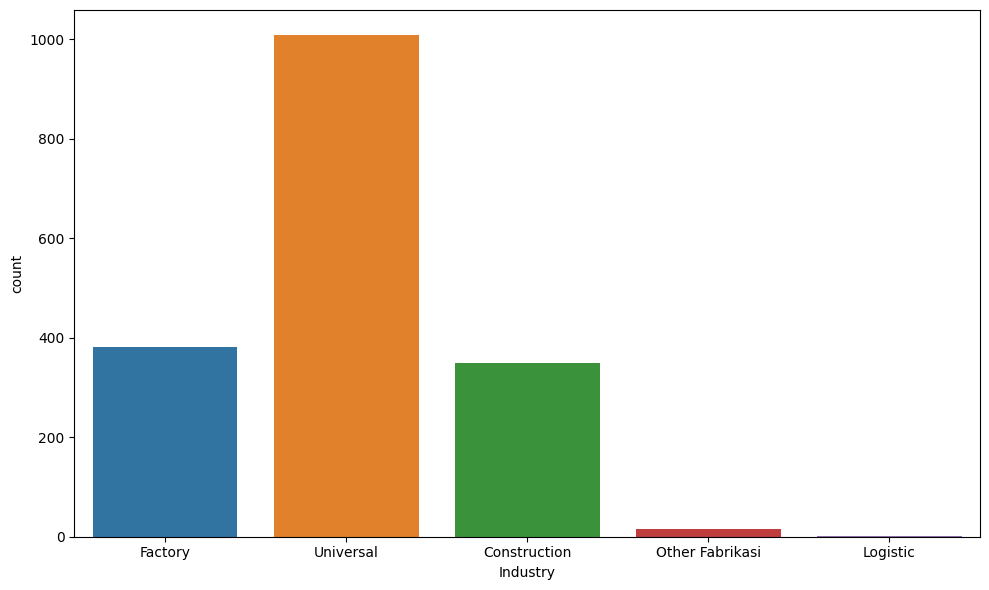

In [17]:
# Memvisualsaikan kolom industry
plt.figure(figsize=(10,6))
sns.countplot(x=data['Industry'], data=data)
plt.tight_layout()

Dari visualisai diatas memberikan informasi bahwa universal merupakan jenis industri yang sering melakukan transaksi dengan PT ABC dan jenis industri dengan jenis logistic merupakan industry dengan jumlah transaksi dengan PT ABC paling sedikit.

4. Jenis barang manakah yang sering dibeli customer?

In [18]:
# Melihat 10 jenis barang teratas dari kolom category
data['Category'].value_counts().head(10)

 Plat Hitam         652
 Hollow             288
 Beton Ulir         176
Service             167
 Beton Polos        159
 Pipa Gas Welded    110
 Wiremesh           100
 Plat Galvanil       91
 Kanal UNP           87
 Strip               86
Name: Category, dtype: int64

In [19]:
# Melihat 10 jenis barang terbawah dari kolom category
data['Category'].value_counts().tail(10)

 Bondex                6
 Expanded Metal        5
 Plat                  3
Pipa Kotak Galvanis    3
 Hollow Galvalum       2
 Kanal INP             1
 Pagar BRC             1
 Scaffolding           1
Semen                  1
Besi Begel             1
Name: Category, dtype: int64

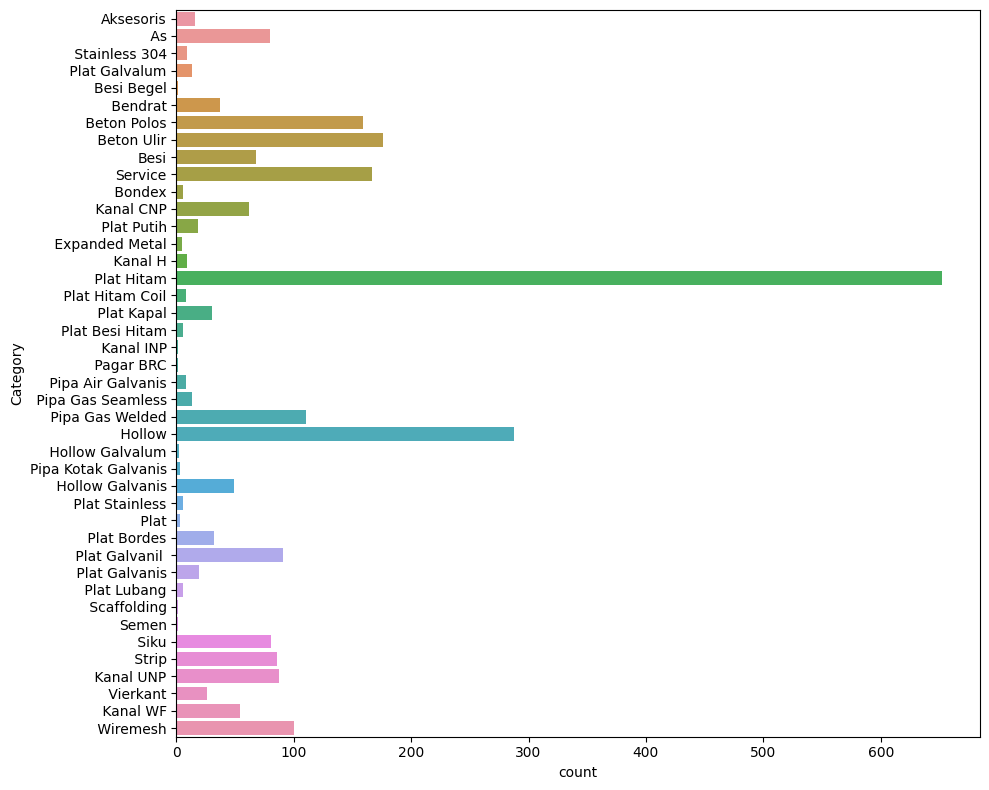

In [20]:
# Memvisualsaikan kolom industry
plt.figure(figsize=(10,8))
sns.countplot(y=data['Category'], data=data)
plt.tight_layout()

Dari hasil visualisasi diatas didapat kesimpulan jenis barang yang sering dibeli oleh customer adalah Plat hitam, diikuti Hollow, Beton ulir. Sedangkan jenis barang yang jarang dibeli leh customer adalah seperti hsil diatas.

5. Berapakah jumlah transaksi yag dlakukan customer? (terbesar dan terkecil)

In [21]:
data.groupby('City')['Kuantitas'].sum().sort_values(ascending=False).head()

City
Surabaya         83236
Pasuruan         77683
Jakarta Pusat    74827
Sidoarjo         14210
Jember           10665
Name: Kuantitas, dtype: int64

In [22]:
data.groupby(['Tgl Faktur','City'])['Kuantitas'].sum().sort_values(ascending=False).head(10)

Tgl Faktur  City         
2021-08-27  Jakarta Pusat    42376
2021-08-28  Jakarta Pusat    16612
2021-08-01  Surabaya         14147
2021-02-22  Surabaya         10950
2021-03-07  Pasuruan         10469
2021-08-23  Jember            9998
2021-04-17  Pasuruan          9969
2021-06-20  Pasuruan          9829
2021-08-26  Pasuruan          9788
2021-07-25  Pasuruan          9609
Name: Kuantitas, dtype: int64

Dari groupby antara kolom tgl faktur,city dengan kolom kuantitas, terdapat informasi bhwa daerah dengan jumlah transaksi terbanyak yaitu daearh surabaya, diikuti pasuruan, jakarta pusat. Sedangkan pada bulan agustus terjadi jumlah transaski tertinggi dan terjadi di daerah jakarta pusat dan surabaya.

In [23]:
data.groupby('Industry')['Kuantitas'].sum().sort_values(ascending=False)

Industry
Universal          200109
Construction       125535
Factory             13488
Other Fabrikasi       293
Logistic                1
Name: Kuantitas, dtype: int64

In [24]:
data.groupby(['Tgl Faktur','Industry'])['Kuantitas'].sum().sort_values(ascending=False).head(10)

Tgl Faktur  Industry    
2021-08-27  Construction    42376
2021-08-28  Construction    16612
2021-08-01  Universal       14288
2021-02-22  Universal       10936
2021-03-07  Universal       10482
2021-08-23  Universal       10067
2021-06-20  Universal        9976
2021-04-17  Universal        9969
2021-08-26  Universal        9816
2021-07-25  Universal        9609
Name: Kuantitas, dtype: int64

Dari groupby antara kolom tgl faktur,industry dengan kolom kuantitas, terdapat informasi bhwa jenis industry dengan jumlah transaksi terbanyak yaitu industry Universal , diikuti Construction, Factory. Sedangkan pada bulan agustus terjadi jumlah transaski tertinggi dan terjadi di industry Construction dan Universal.

In [25]:
data.groupby('Category')['Kuantitas'].sum().sort_values(ascending=False).head()

Category
 Beton Polos        91282
Besi                73663
 Plat Hitam Coil    68824
 Beton Ulir         54389
 Hollow             23757
Name: Kuantitas, dtype: int64

In [26]:
data.groupby(['Tgl Faktur','Category'])['Kuantitas'].sum().sort_values(ascending=False).head(10)

Tgl Faktur  Category        
2021-08-27   Beton Polos        36626
2021-08-28   Beton Polos        16860
2021-08-01  Besi                14016
2021-02-22   Plat Hitam Coil    10896
2021-03-07  Besi                10468
2021-08-23   Plat Hitam Coil     9998
2021-04-17   Plat Hitam Coil     9968
2021-06-20   Plat Hitam Coil     9828
2021-08-26   Plat Hitam Coil     9788
2021-07-25  Besi                 9608
Name: Kuantitas, dtype: int64

Dari groupby antara kolom tgl faktur,category dengan kolom kuantitas, terdapat informasi bhwa jenis category dengan jumlah transaksi terbanyak yaitu category Beton Polos, diikuti Besi, Plat Hitam Coil. Sedangkan pada bulan agustus terjadi jumlah transaski tertinggi dan terjadi pada jenis category Beton Polos dan Besi.

6. Berapa harga HPP tertinggi,terendah dan rata-ratanya?

In [27]:
# Mencari nilai min, maks, rata2, dan median dari kolom Nilai HPP
maksimal=data['Nilai HPP'].max()
minimal=data['Nilai HPP'].min()
rata2=data['Nilai HPP'].mean()
median=data['Nilai HPP'].median()

print("Niai minimal dari Nilai HPP adalah ",minimal)
print("Niai maksimal dari Nilai HPP adalah ",maksimal)
print("Niai rata-rata dari Nilai HPP adalah ",rata2)
print("Niai tengah/median dari Nilai HPP adalah ",median)

Niai minimal dari Nilai HPP adalah  15000.0
Niai maksimal dari Nilai HPP adalah  1897333170.9
Niai rata-rata dari Nilai HPP adalah  17992419.76873745
Niai tengah/median dari Nilai HPP adalah  4950032.545


<Axes: >

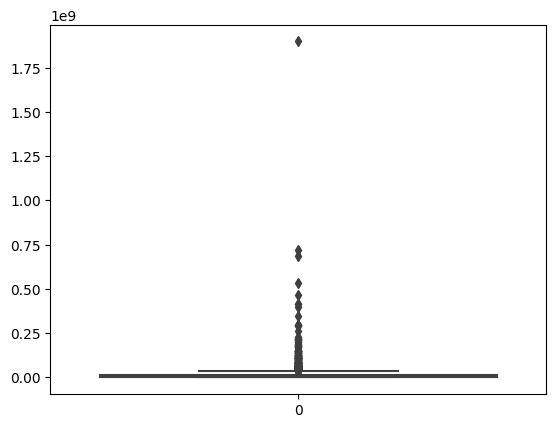

In [28]:
# Melihat persebaran Nilai HPP dengan boxplot
sns.boxplot(data['Nilai HPP'])

Dari visualisasi diatas terdapat informasi bahwa nilai hpp/nilai harga pokok penjulan terendah adalah 15.000,0, nilai maksimal 1.897.333.170,9, rata-rata 17.992.419'77, dan nilai tengah 4.950.032,55. Sehingga dari visualisai diatas terdapat outlier dan harus di lakukan handling untuk bisa dilakukan modeling.

7. Berapa harga jual tertinggi,terendah dan rata-ratanya?

In [29]:
# Mencari nilai min, maks, rata2, dan median dari kolom Harga Jual
maksimal=data['Harga Jual'].max()
minimal=data['Harga Jual'].min()
rata2=data['Harga Jual'].mean()
median=data['Harga Jual'].median()

print("Niai minimal dari Harga Jual adalah ",minimal)
print("Niai maksimal dari Harga Jual adalah ",maksimal)
print("Niai rata-rata dari Harga Jual adalah ",rata2)
print("Niai tengah/median dari Harga Jual adalah ",median)

Niai minimal dari Harga Jual adalah  38181.84
Niai maksimal dari Harga Jual adalah  2080263500.0
Niai rata-rata dari Harga Jual adalah  21135902.703301158
Niai tengah/median dari Harga Jual adalah  6263182.0


<Axes: >

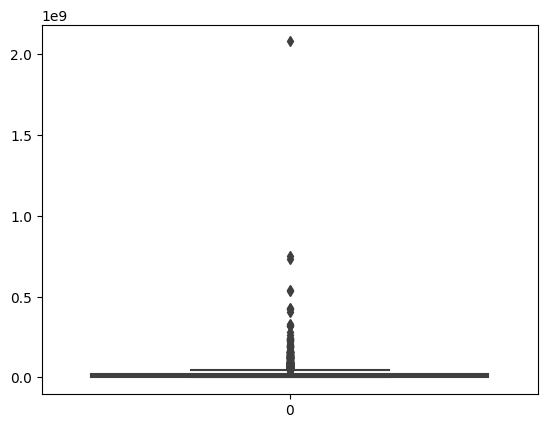

In [30]:
# Melihat persebaran Harga Jual dengan boxplot
sns.boxplot(data['Harga Jual'])

Dari visualisasi diatas terdapat informasi bahwa nilai harga jual terendah adalah 38.181,84, nilai maksimal 2.080.263.500, rata-rata 21.135.902,70, dan nilai tengah 6.263.182. Sehingga dari visualisai diatas terdapat outlier dan harus di lakukan handling untuk bisa dilakukan modeling.

8. Berapa nilai margin tertinggi,terendah dan rata-ratanya?

In [31]:
# Mencari nilai min, maks, rata2, dan median dari kolom Margin
maksimal=data['Margin'].max()
minimal=data['Margin'].min()
rata2=data['Margin'].mean()
median=data['Margin'].median()

print("Niai minimal dari Margin adalah ",minimal)
print("Niai maksimal dari Margin adalah ",maksimal)
print("Niai rata-rata dari Margin adalah ",rata2)
print("Niai tengah/median dari Margin adalah ",median)

Niai minimal dari Margin adalah  -3131364.3100000005
Niai maksimal dari Margin adalah  182930329.0999999
Niai rata-rata dari Margin adalah  3143482.9345637066
Niai tengah/median dari Margin adalah  890025.7249999996


<Axes: >

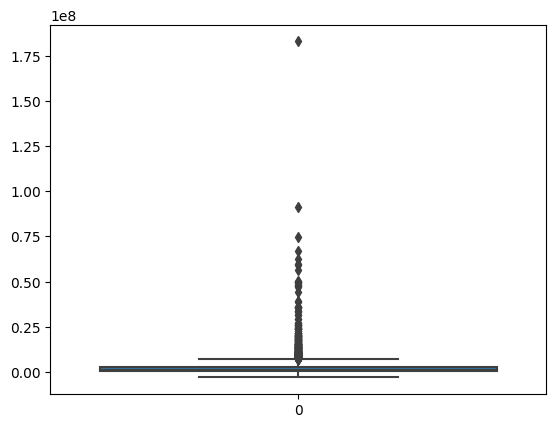

In [32]:
# Melihat persebaran nilai Margin dengan boxplot
sns.boxplot(data['Margin'])

Dari visualisasi diatas terdapat informasi bahwa nilai harga jual terendah adalah -3.131.364,31, nilai maksimal 182.930.329,11, rata-rata 3.143.482,93, dan nilai tengah 890.025,72. Sehingga dari visualisai diatas terdapat outlier dan harus di lakukan handling untuk bisa dilakukan modeling dan juga dari informasi diatas terdapat nilai minus yang menandakan nilai kerugian dari transaksi di PT ABC tersebut.

# Data Pre-Processing

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   No. Faktur     2590 non-null   object        
 1   Tgl Faktur     2590 non-null   datetime64[ns]
 2   No. Pelanggan  2590 non-null   int64         
 3   City           2589 non-null   object        
 4   Industry       1755 non-null   object        
 5   No. Customer   2590 non-null   int64         
 6   No. Barang     2590 non-null   object        
 7   Category       2590 non-null   object        
 8   Kuantitas      2590 non-null   int64         
 9   Nilai HPP      2590 non-null   float64       
 10  Harga Jual     2590 non-null   float64       
 11  Margin         2590 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 242.9+ KB


In [34]:
data.describe()

,No. Pelanggan,No. Customer,Kuantitas,Nilai HPP,Harga Jual,Margin
count,2590.000000,2590.000000,2590.000000,2.590000e+03,2.590000e+03,2.590000e+03
mean,3741.040541,1791.330888,151.487645,1.799242e+07,2.113590e+07,3.143483e+06
std,406.590754,418.453535,963.251427,5.537919e+07,6.083198e+07,7.369133e+06
min,3002.000000,1119.000000,1.000000,1.500000e+04,3.818184e+04,-3.131364e+06
25%,3419.000000,1247.000000,3.000000,1.281818e+06,1.790909e+06,2.777280e+05
50%,3727.000000,2051.000000,9.000000,4.950033e+06,6.263182e+06,8.900257e+05
75%,4122.000000,2152.000000,48.000000,1.593517e+07,1.951761e+07,2.913549e+06
max,4406.000000,2152.000000,28498.000000,1.897333e+09,2.080264e+09,1.829303e+08


### Renaming Data

Rename kolom Nilai HPP, Harga Jual

In [35]:
df = data.rename(columns={"Nilai HPP": "Nilai_HPP",  
                        "Harga Jual":"Harga_Jual"})

df.head()

,No. Faktur,Tgl Faktur,No. Pelanggan,City,Industry,No. Customer,No. Barang,Category,Kuantitas,Nilai_HPP,Harga_Jual,Margin
0,429dd***12120,2021-11-01,3056,Kota Ambon,NaN,2051,c685a76e,Aksesoris,30,1627800.00,2041818.18,414018.18
1,f82b3***2b330,2021-09-02,4169,Sidoarjo,Factory,1247,9dd33d34,As,9,1377000.00,2970000.20,1593000.20
2,2a10b***47139,2021-09-17,4169,Sidoarjo,Factory,1247,3f81ec81,As,5,1876756.20,2897273.00,1020516.80
3,8f4f1***4d0e1,2021-02-01,3050,Sidoarjo,Factory,2051,69a96587,As,28,17761363.64,20338182.01,2576818.37
4,d8b69***a516d,2021-09-27,3628,Sidoarjo,Universal,1247,94e04da3,As,1,683227.27,1051819.00,368591.73


Rename data di dalam Kolom City

In [36]:
# Memperbaiki kata didalam kolom City    
for x in data.index:
  if data.loc[x, "City"] == ' Sidoarjo':
    data.loc[x, "City"] = 'Sidoarjo'
  elif data.loc[x, "City"] == 'Gresik':
    data.loc[x, "City"] = 'Kab. Gresik'
  elif data.loc[x, "City"] == 'Surabaya / Jawa Timur ':
    data.loc[x, "City"] = 'Surabaya'
  elif data.loc[x, "City"] == 'Kediri':
    data.loc[x, "City"] = 'Kab. Kediri'
  elif data.loc[x, "City"] == 'Sidoarjo/Jawa Timur ':
    data.loc[x, "City"] = 'Sidoarjo'
  elif data.loc[x, "City"] == 'Surabaya / Jawa Timur':
    data.loc[x, "City"] = 'Surabaya'
  elif data.loc[x, "City"] == 'Nagekeo':
    data.loc[x, "City"] = 'Kab. Nagekeo'
  elif data.loc[x, "City"] == ' Sidoarjo':
    data.loc[x, "City"] = 'Sidoarjo'
  elif data.loc[x, "City"] == 'Kab Gresik':
    data.loc[x, "City"] = 'Kab. Gresik'
  elif data.loc[x, "City"] == ' Gresik':
    data.loc[x, "City"] = 'Kab. Gresik'
  elif data.loc[x, "City"] == 'Surabaya Jawa Timur':
    data.loc[x, "City"] = 'Surabaya'
  elif data.loc[x, "City"] == ' Banyuwangi':
    data.loc[x, "City"] = 'Kab. Banyuwangi'
  elif data.loc[x, "City"] == 'Surabaya/Jawa Timur/60293':
    data.loc[x, "City"] = 'Surabaya'
  elif data.loc[x, "City"] == 'Surabaya/ Jawa Timur ':
    data.loc[x, "City"] = 'Surabaya'
  elif data.loc[x, "City"] == 'Kota Kediri/Jawa Timur':
    data.loc[x, "City"] = 'Kota Kediri'
  elif data.loc[x, "City"] == 'Kab Kediri':
    data.loc[x, "City"] = 'Kab. Kediri'
  elif data.loc[x, "City"] == 'Kab. Sidoarjo':
    data.loc[x, "City"] = 'Sidoarjo'
  elif data.loc[x, "City"] == 'Palu':
    data.loc[x, "City"] = 'Kota Palu'
  elif data.loc[x, "City"] == 'Pamekasan':
    data.loc[x, "City"] = 'Kab Pamekasan'
  elif data.loc[x, "City"] == ' Kab. Jepara':
    data.loc[x, "City"] = 'Kab. Jepara'
  elif data.loc[x, "City"] == 'Banyuwangi/ Jawa Timur':
    data.loc[x, "City"] = 'Kab. Banyuwangi'
  elif data.loc[x, "City"] == 'Banyuwangi':
    data.loc[x, "City"] = 'Kab. Banyuwangi'
  elif data.loc[x, "City"] == 'Sumenep. Jawa Timur':
    data.loc[x, "City"] = 'Sumenep'
  elif data.loc[x, "City"] == 'Bantul Diy 55188':
    data.loc[x, "City"] = 'Bantul'
  elif data.loc[x, "City"] == ' Tulungagung':
    data.loc[x, "City"] = 'Tulungagung'
  elif data.loc[x, "City"] == 'Malang Jawa Timur':
    data.loc[x, "City"] = 'Malang'
  elif data.loc[x, "City"] == ' Kota Balikpapan':
    data.loc[x, "City"] = 'Kota Balikpapan'
  elif data.loc[x, "City"] == 'Balikpapan. Kalimantan Timur ':
    data.loc[x, "City"] = 'Kota Balikpapan'
  elif data.loc[x, "City"] == 'Kota Jayapura ':
    data.loc[x, "City"] = 'Kota Jayapura'
  elif data.loc[x, "City"] == 'Balikpapan':
    data.loc[x, "City"] = 'Kota Balikpapan'
  elif data.loc[x, "City"] == 'Sorong':
    data.loc[x, "City"] = 'Kota Sorong'
  elif data.loc[x, "City"] == 'Lamongan':
    data.loc[x, "City"] = 'Kab. Lamongan'
  elif data.loc[x, "City"] == '66126':
    data.loc[x, "City"] = 'Kota Blitar'
  elif data.loc[x, "City"] == '99552 ':
    data.loc[x, "City"] = 'Kab. Jayawijaya'
  elif data.loc[x, "City"] == '65152':
    data.loc[x, "City"] = 'Malang'
  elif data.loc[x, "City"] == 'Denpasar ':
    data.loc[x, "City"] = 'Denpasar'
  elif data.loc[x, "City"] == 'Cilacap':
    data.loc[x, "City"] = 'Kab. Cilacap'
  elif data.loc[x, "City"] == 'Ende':
    data.loc[x, "City"] = 'Kab. Ende'
  elif data.loc[x, "City"] == 'Nganjuk':
    data.loc[x, "City"] = 'Kab. Nganjuk'
  elif data.loc[x, "City"] == 'Kab':
    data.loc[x, "City"] = 'Unknown'
  elif data.loc[x, "City"] == 'Jawa Barat':
    data.loc[x, "City"] = 'Unknown'

### Cek duplicate data

In [37]:
# Cek duplicate
duplicate = data[data.duplicated()]
duplicate

,No. Faktur,Tgl Faktur,No. Pelanggan,City,Industry,No. Customer,No. Barang,Category,Kuantitas,Nilai HPP,Harga Jual,Margin


### Cek Missing Value Pada Data

In [38]:
# Mengecek berapa jumlah null value pada masing masing kolom. 
jumlah_missing = pd.isnull(data).sum()
jumlah_missing

No. Faktur         0
Tgl Faktur         0
No. Pelanggan      0
City               1
Industry         835
No. Customer       0
No. Barang         0
Category           0
Kuantitas          0
Nilai HPP          0
Harga Jual         0
Margin             0
dtype: int64

In [39]:
# menghitung ratio missing value
rasio = jumlah_missing.div(len(data))
rasio

No. Faktur       0.000000
Tgl Faktur       0.000000
No. Pelanggan    0.000000
City             0.000386
Industry         0.322394
No. Customer     0.000000
No. Barang       0.000000
Category         0.000000
Kuantitas        0.000000
Nilai HPP        0.000000
Harga Jual       0.000000
Margin           0.000000
dtype: float64

### Cek Outlier Data

Pada Cek Outlier data ini, yang akan dilihat outlier yang diberikan adalah data yang nantinya akan dipakai di dalam mencari nilai daripada RFM untuk menentukan segemntasi pelanggan

Melihat Outlier pada setiap data

<Axes: >

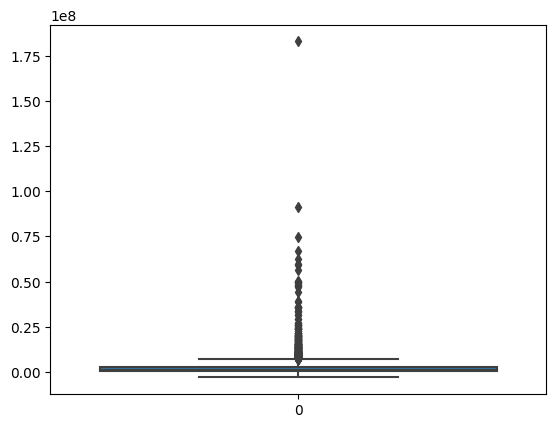

In [40]:
# Melihat persebaran Harga Jual dengan boxplot
sns.boxplot(df['Margin'])

<Axes: >

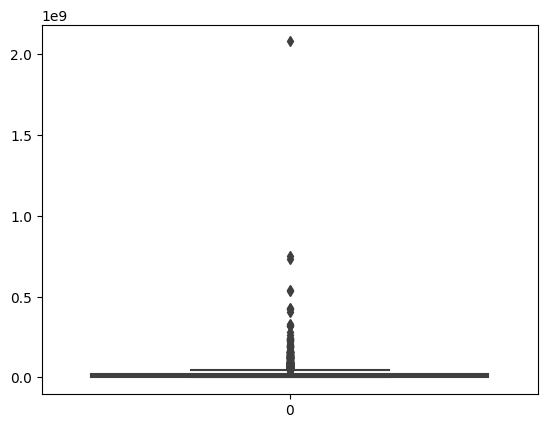

In [41]:
# Melihat persebaran Harga Jual dengan boxplot
sns.boxplot(df['Harga_Jual'])

<Axes: >

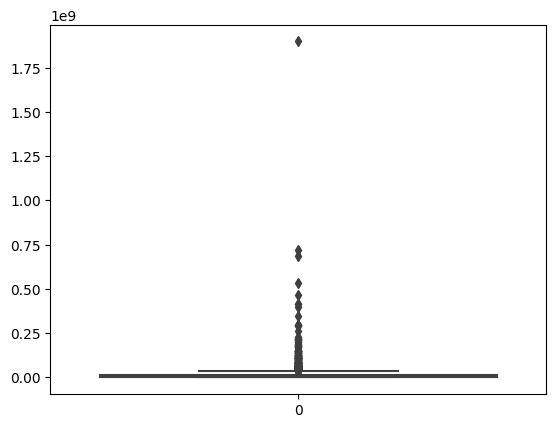

In [42]:
# Melihat persebaran Nilai HPP dengan boxplot
sns.boxplot(df['Nilai_HPP'])

### Handling Outlier data

In [43]:
outlier = []

Handling Outlier data Margin

In [44]:
# Deleting
tr = []
for j in list(df.Margin):
    f = j in outlier
    if f is False:
        tr.append(j)

In [45]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df.Margin)))
print("Banyaknya data setelah diatasi outlier: ",len(tr))

Banyaknya data sebelum diatasi outlier:  2590
Banyaknya data setelah diatasi outlier:  2590


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2df856bd30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2df84c83a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2df856a560>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2df84c9360>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2df84ca080>],
 'means': []}

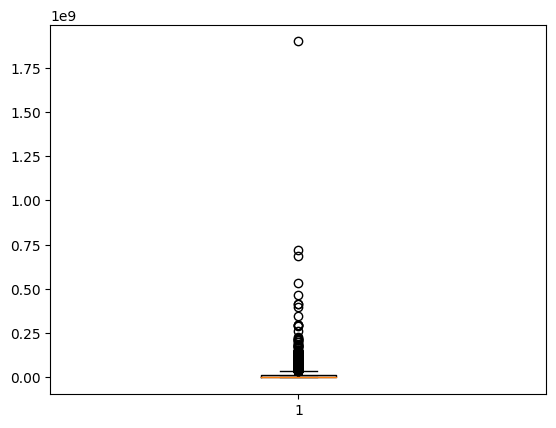

In [46]:
# Melihat persebaran Nilai HPP dengan boxplot
plt.boxplot(df['Nilai_HPP'])

Handling Outlier data Harga Jual

In [47]:
e = []
for y in list(df.Harga_Jual):
    ff = y in df
    if ff is True:
        y=statistics.median(list(df.Harga_Jual))
    else:
        y=y
    e.append(y)

In [48]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df.Harga_Jual)))
print("Median data : ",statistics.median(list(df.Harga_Jual)))
print("Mean data setelah replacing median : ",statistics.mean(e))
print("Median data setelah replacing median: ",statistics.median(e))

Mean data :  21135902.703301158
Median data :  6263182.0
Mean data setelah replacing median :  21135902.703301158
Median data setelah replacing median:  6263182.0


Handling Outlier data Harga HPP

In [49]:
p = []
for y in list(df.Nilai_HPP):
    ff = y in df
    if ff is True:
        y=statistics.median(list(df.Nilai_HPP))
    else:
        y=y
    p.append(y)

In [50]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df.Nilai_HPP)))
print("Median data : ",statistics.median(list(df.Nilai_HPP)))
print("Mean data setelah replacing median : ",statistics.mean(p))
print("Median data setelah replacing median: ",statistics.median(p))

Mean data :  17992419.76873745
Median data :  4950032.545
Mean data setelah replacing median :  17992419.76873745
Median data setelah replacing median:  4950032.545


# Analisis RFM (Recency, Frequency, Monetary)

RFM (Recency, Frequency, Monetary) merupakan metode yang digunakan untuk menganalisis tingkah laku pelanggan, efisiensi promosi, dan menganalisis profit penjualan. Pada kasus ini, metode RFM digunakan untuk mengkategorikan pelanggan berdasarkan kriteria tertentu.

In [51]:
#Membuat dataframe hasil data pre-processing
df_margin = pd.DataFrame(tr, columns=['Margin'])
df_HargaJual = pd.DataFrame(e, columns=['Harga_Jual'])
df_HPP = pd.DataFrame(p, columns=['Nilai_HPP'])

df_v2 = pd.concat([df[['No. Faktur', 'Tgl Faktur', 'No. Pelanggan', 'City', 'Industry', 'No. Customer', 'No. Barang', 'Category', 'Kuantitas']], df_HPP, df_HargaJual, df_margin], axis=1)
df_v2.head()

,No. Faktur,Tgl Faktur,No. Pelanggan,City,Industry,No. Customer,No. Barang,Category,Kuantitas,Nilai_HPP,Harga_Jual,Margin
0,429dd***12120,2021-11-01,3056,Kota Ambon,NaN,2051,c685a76e,Aksesoris,30,1627800.00,2041818.18,414018.18
1,f82b3***2b330,2021-09-02,4169,Sidoarjo,Factory,1247,9dd33d34,As,9,1377000.00,2970000.20,1593000.20
2,2a10b***47139,2021-09-17,4169,Sidoarjo,Factory,1247,3f81ec81,As,5,1876756.20,2897273.00,1020516.80
3,8f4f1***4d0e1,2021-02-01,3050,Sidoarjo,Factory,2051,69a96587,As,28,17761363.64,20338182.01,2576818.37
4,d8b69***a516d,2021-09-27,3628,Sidoarjo,Universal,1247,94e04da3,As,1,683227.27,1051819.00,368591.73


In [52]:
#Membuat kolom total pengeluaran oleh customer (Total_Cost)
df_v2['Total_Cost'] = df_v2['Harga_Jual'] * df_v2['Kuantitas']
df_v2.head()

,No. Faktur,Tgl Faktur,No. Pelanggan,City,Industry,No. Customer,No. Barang,Category,Kuantitas,Nilai_HPP,Harga_Jual,Margin,Total_Cost
0,429dd***12120,2021-11-01,3056,Kota Ambon,NaN,2051,c685a76e,Aksesoris,30,1627800.00,2041818.18,414018.18,6.125455e+07
1,f82b3***2b330,2021-09-02,4169,Sidoarjo,Factory,1247,9dd33d34,As,9,1377000.00,2970000.20,1593000.20,2.673000e+07
2,2a10b***47139,2021-09-17,4169,Sidoarjo,Factory,1247,3f81ec81,As,5,1876756.20,2897273.00,1020516.80,1.448636e+07
3,8f4f1***4d0e1,2021-02-01,3050,Sidoarjo,Factory,2051,69a96587,As,28,17761363.64,20338182.01,2576818.37,5.694691e+08
4,d8b69***a516d,2021-09-27,3628,Sidoarjo,Universal,1247,94e04da3,As,1,683227.27,1051819.00,368591.73,1.051819e+06


Filtering Data

In [53]:
df_rfm = df_v2[(df_v2.Kuantitas > 0) & (df_v2.Harga_Jual >= 0)]
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 0 to 2589
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   No. Faktur     2590 non-null   object        
 1   Tgl Faktur     2590 non-null   datetime64[ns]
 2   No. Pelanggan  2590 non-null   int64         
 3   City           2589 non-null   object        
 4   Industry       1755 non-null   object        
 5   No. Customer   2590 non-null   int64         
 6   No. Barang     2590 non-null   object        
 7   Category       2590 non-null   object        
 8   Kuantitas      2590 non-null   int64         
 9   Nilai_HPP      2590 non-null   float64       
 10  Harga_Jual     2590 non-null   float64       
 11  Margin         2590 non-null   float64       
 12  Total_Cost     2590 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 283.3+ KB


#### Recency

Recency menunjukkan seberapa banyak waktu berkunjung baru-baru ini untuk membeli barang. Nilai recency mengacu pada tanggal terakhir transaksi/pembelian. 

In [54]:
#Sorting urutan data berdasarkantanggal terakhir transaksi
sorted_df = df_v2.sort_values(by='Tgl Faktur')
sorted_df.tail()

,No. Faktur,Tgl Faktur,No. Pelanggan,City,Industry,No. Customer,No. Barang,Category,Kuantitas,Nilai_HPP,Harga_Jual,Margin,Total_Cost
645,567d3***7d64e,2021-12-31,4104,Surabaya,Universal,1247,ec1c420f,Kanal CNP,9,2254323.00,2417273.00,162950.00,2.175546e+07
1897,b8457***a6005,2021-12-31,3351,Kota Kediri,Factory,1247,ae0e8edd,Hollow,105,47655485.69,51282727.47,3627241.78,5.384686e+09
1898,fac1f***59a00,2021-12-31,3351,Kota Kediri,Factory,1247,ae0e8edd,Hollow,178,80157873.12,86256364.09,6098490.97,1.535363e+10
1629,b8457***a6005,2021-12-31,3351,Kota Kediri,Factory,1247,1c31ddac,Hollow,10,7476818.47,8038181.85,561363.38,8.038182e+07
1863,b8457***a6005,2021-12-31,3351,Kota Kediri,Factory,1247,12a092b5,Hollow,218,80256200.38,86520000.33,6263799.95,1.886136e+10


In [55]:
#Melihat tanggal terakhir transaksi
df_v2['Tgl Faktur'].max()

Timestamp('2021-12-31 00:00:00')

Transaksi terakhir yang terjadi dalam perusahaan ialah 31 Desember 2021 (2021-12-31). Tanggal tersebut yang akan dijadikan sebagai acuan penentuan nilai Recency.

In [56]:
# Menentukan tanggal terakhir
now = '2021-12-31'
now = pd.to_datetime(now)

In [57]:
#Group berdasarkan pembelian terakhir customer
recency = df_v2.groupby(['No. Pelanggan'], as_index=False)['Tgl Faktur'].max()
recency.columns = ['CustomerID', 'LastPurchaseDate']
recency.head()

,CustomerID,LastPurchaseDate
0,3002,2021-11-12
1,3006,2021-06-12
2,3008,2021-06-19
3,3010,2021-03-06
4,3014,2021-05-31


In [58]:
#Menambahkan kolom Recency (seberapa sering pembelian mengacu pada tanggal terbaru dalam beberapa hari)
recency['Recency'] = recency.LastPurchaseDate.apply(lambda x : (now - x).days)
recency.sort_values(by='Recency')

,CustomerID,LastPurchaseDate,Recency
105,3351,2021-12-31,0
193,3690,2021-12-31,0
308,4104,2021-12-31,0
345,4218,2021-12-31,0
161,3579,2021-12-30,1
331,4181,2021-12-30,1
367,4273,2021-12-30,1
244,3903,2021-12-30,1
332,4183,2021-12-27,4
298,4061,2021-12-27,4


Recency ditentukan berdasarkan perbedaan tanggal terbaru terhadap tanggal terakhir transaksi. Semakin tinggi nilai recency, semakin lama pembeli tidak melakukan transaksi.

Customer 3351, 3690, 4104, dan 4218 memiliki nilai recency 0 (terakhir berbelanja tanggal 31 Desember 2021). Berbeda dengan customer 3501, 4081, dan 4270 yang memiliki nilai recency 358 (terakhir berbelanja 358 hari sebelumnya, tepatnya tangga 7 Januari 2021). 

#### Frequency

Frequency menunjukkan seberapa sering customer melakukan pembelian.

In [59]:
#Checking frekuensi transaksi oleh pelanggan
frequency = df_v2.copy()
frequency.drop_duplicates(subset=['No. Pelanggan', 'No. Faktur'], keep='first', inplace=True)
frequency = frequency.groupby('No. Pelanggan',as_index=False)['No. Faktur'].count()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()


,CustomerID,Frequency
0,3002,2
1,3006,3
2,3008,1
3,3010,2
4,3014,4


In [60]:
frequency.sort_values(by='Frequency')

,CustomerID,Frequency
307,4102,1
288,4029,1
287,4028,1
122,3440,1
284,4025,1
125,3452,1
279,4004,1
276,3998,1
272,3983,1
130,3471,1


Frequency menunjukkan jumlah transaksi yang dilakukan. 
Customer 4061 memiliki nilai frequency terbesar, yaitu 79. Nilai tersebut menunjukkan bahwa customer 4061 paling sering melakukan transaksi yaitu sebanyak 79 kali transaksi.

#### Monetary

Monetary menunjukkan jumlah uang yang dikeluarkan untuk pembelian barang.

In [61]:
monetary = df_v2.groupby('No. Pelanggan', as_index=False)['Total_Cost'].sum()
monetary.columns = ['CustomerID', 'Monetary']
monetary.sort_values(by='Monetary', ascending=False)

,CustomerID,Monetary
289,4034,7.348384e+13
117,3413,1.127904e+13
328,4173,4.560289e+12
47,3135,2.804377e+12
249,3922,1.886186e+12
104,3345,1.822664e+12
271,3982,1.091535e+12
152,3544,1.021026e+12
105,3351,9.331003e+11
410,4394,8.992758e+11


Monetary merupakan jumlah pengeluaran customer. Customer 4034 memiliki nilai monetary paling tinggi yang menunjukkan bahwa customer tersebut mengeluarkan uang paling banyak.

#### RFM

In [62]:
#Combine Recency dan Frequency
rf = recency.merge(frequency, left_on='CustomerID', right_on='CustomerID')
rf.head()

,CustomerID,LastPurchaseDate,Recency,Frequency
0,3002,2021-11-12,49,2
1,3006,2021-06-12,202,3
2,3008,2021-06-19,195,1
3,3010,2021-03-06,300,2
4,3014,2021-05-31,214,4


In [63]:
#Combine RF dengan Monetary
rfm = rf.merge(monetary, left_on='CustomerID', right_on='CustomerID')
rfm.set_index('CustomerID', inplace=True)
rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
CustomerID,,,,
3002,2021-11-12,49,2,9.944884e+09
3006,2021-06-12,202,3,1.312091e+09
3008,2021-06-19,195,1,1.713300e+10
3010,2021-03-06,300,2,3.994727e+07
3014,2021-05-31,214,4,2.487805e+09


In [64]:
#Hapus Kolom LastPurchaseDate
rfm.drop(columns=['LastPurchaseDate'],inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
3002,49,2,9.944884e+09
3006,202,3,1.312091e+09
3008,195,1,1.713300e+10
3010,300,2,3.994727e+07
3014,214,4,2.487805e+09


Nilai **Recency** menunjukkan seberapa banyak waktu berkunjung baru-baru ini untuk membeli barang. Nilai recency mengacu pada tanggal terakhir transaksi/pembelian. Semakin tinggi nilainya, semakin lama customer tersebut tidak melakukan transaksi.

Nilai **Frequency** menunjukkan jumlah transaksi. Semakin tinggi nilainya, semakin sering customer melakukan transaksi.

Nilai **Monetary** menunjukkan jumlah uang yang dikeluarkan untuk pembelian barang. Nilai Monetary didapatkan dengan mengalikan harga jual dengan kuantitas.

Idealnyaa, **pelanggan terbaik** memiliki **nilai recency yang rendah** tetapi **nilai frequency dan monetary yang tinggi**. 

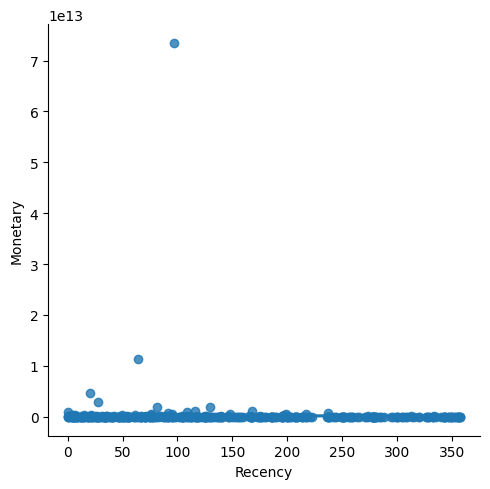

In [65]:
#Plot Monetary vs Recency
sns.lmplot(x='Recency', y='Monetary', data=rfm, fit_reg=True)

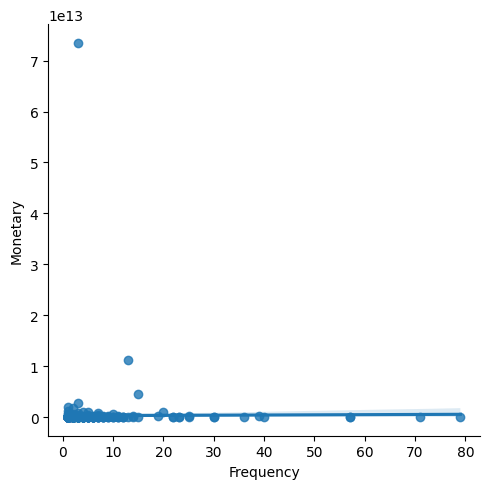

In [66]:
#Plot Frequency vs Monetary
sns.lmplot(x='Frequency', y='Monetary', data=rfm, fit_reg=True)

# Feature Engineering and Feature Selection

In [67]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,51.0,1.0,5.387637e+07
0.50,120.0,2.0,4.175545e+08
0.75,217.0,4.0,4.973874e+09


Perlu dilakukan pengklasifikasian berdasarkan quartiles untuk memastikan tinggi-rendahnya nilai RFM. 
Semakin tinggi pengkali quartile, semakin kecil periode pembelian dan monetary. Namun, hal berbanding terbalik terhadap perlakuan recency. Semakin tinggi pengkali quartile, semakin tinggi nilai recency.

In [68]:
RFMScores= rfm.copy()

#Recency Scoring
def Rscoring(x,p,d):
   if x <= d[p][0.25]:
      return 1
   elif x <= d[p][0.50]:
      return 2
   elif x <= d[p][0.75]:
      return 3
   else:
      return 4

#Frequency and Monetary Scoring
def FMscoring (x,p,d):
   if x <= d[p][0.25]:
      return 4
   elif x <= d[p][0.50]:
      return 3
   elif x <= d[p][0.75]:
      return 2
   else:
      return 1

In [69]:
RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency', quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency', quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary', quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
print(RFMScores.head())

            Recency  Frequency      Monetary  R  F  M RFMgroup  Score
CustomerID                                                           
3002             49          2  9.944884e+09  1  3  1      131      5
3006            202          3  1.312091e+09  3  2  2      322      7
3008            195          1  1.713300e+10  3  4  1      341      8
3010            300          2  3.994727e+07  4  3  4      434     11
3014            214          4  2.487805e+09  3  2  2      322      7


<ipython-input-70-3dc8e1cd46e6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
<ipython-input-70-3dc8e1cd46e6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label"

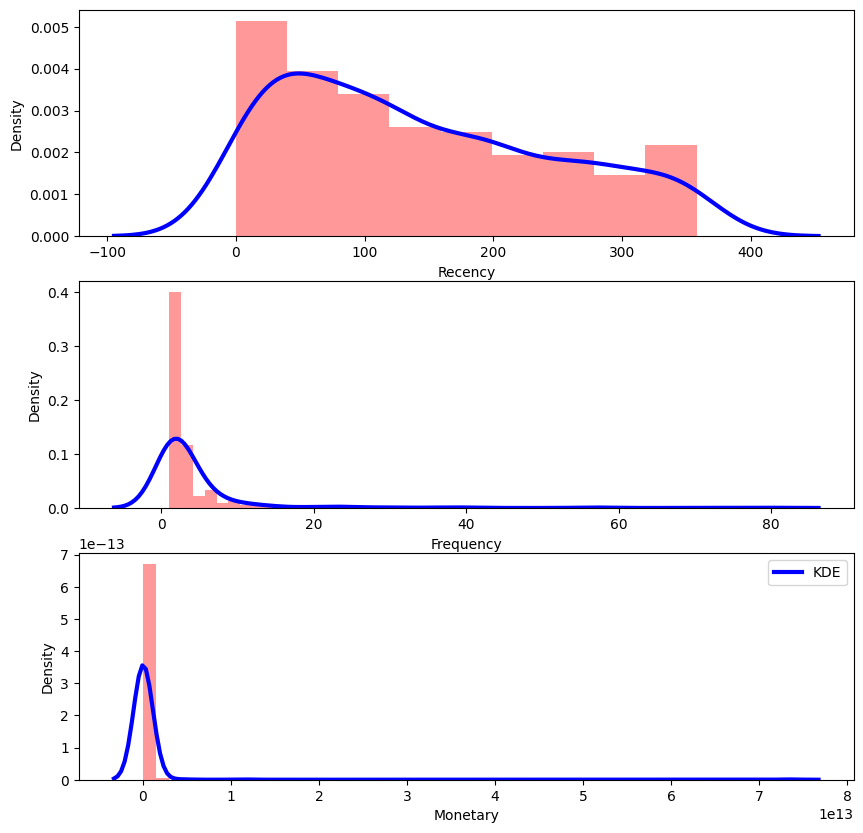

In [70]:
#Melihat Distribusi Data Hasil RFM Score
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

Data belum terdistribusi normal. Oleh karena itu perlu dilakukan transfotmasi dengan MinMaxScaler.

In [71]:
clustering_rfm = rfm[['Recency',"Frequency","Monetary"]].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
3002,49,2,9.944884e+09
3006,202,3,1.312091e+09
3008,195,1,1.713300e+10
3010,300,2,3.994727e+07
3014,214,4,2.487805e+09


In [72]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_rfm)
rfm_scaled = pd.DataFrame(x_scaled,columns=['Recency','Frequency','Monetary'])
rfm_scaled.head()

,Recency,Frequency,Monetary
0,0.136872,0.012821,1.353309e-04
1,0.564246,0.025641,1.785211e-05
2,0.544693,0.000000,2.331499e-04
3,0.837989,0.012821,5.402301e-07
4,0.597765,0.038462,3.385174e-05


# Modeling and Evaluation

## Modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

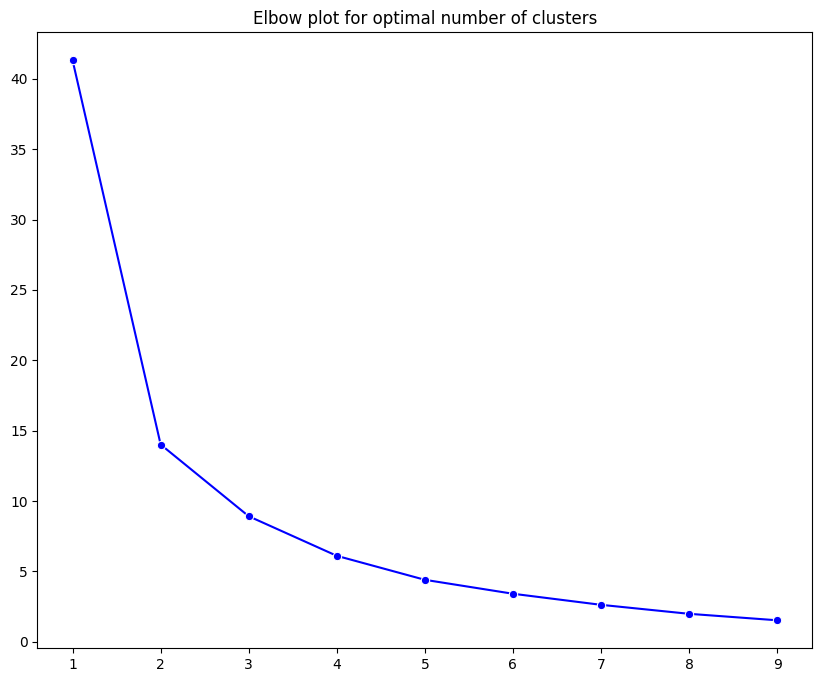

In [73]:
# Elbow method

wscc = []
for i in range(1,10): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(rfm_scaled)
    wscc.append(kmeans.inertia_)  

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,10),y=wscc,marker="o",c='blue')
plt.title("Elbow plot for optimal number of clusters")

In [74]:
wscc

[41.3185043849691,
 14.012790008452985,
 8.916688128979018,
 6.104659940433413,
 4.400111141219444,
 3.409575141554781,
 2.62232321987717,
 1.9835438500276705,
 1.5240561382049402]

In [75]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_scaled)
    Sum_of_squared_error.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

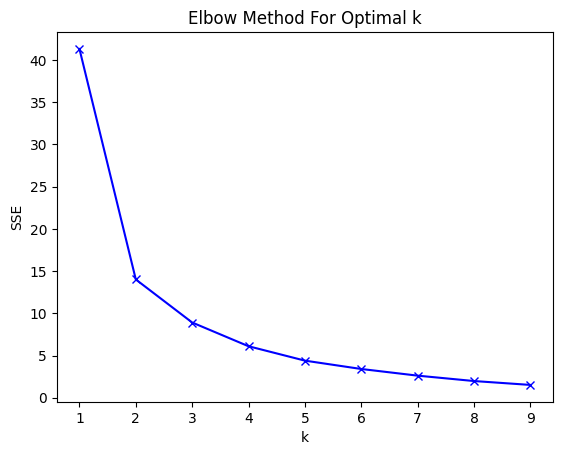

In [76]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

Dilihat dari grafik elbow metod tersebut, perubahan siku paling signifikan berada pada no 2. Untuk mengevaluasi metode tersebut maka digunakan silhoutte score dibawah ini

## Evaluation

In [77]:
# Silhoutte score
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(rfm_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(rfm_scaled, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.5945444759748071
For n_clusters = 3, silhouette score is 0.523252378170515
For n_clusters = 4, silhouette score is 0.5498172735699479
For n_clusters = 5, silhouette score is 0.5158148524242805


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.5196067253701828
For n_clusters = 7, silhouette score is 0.519500343675418


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.5345356211872385
For n_clusters = 9, silhouette score is 0.5077614626074459


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dari hasil silhoutte score, titik optimum terletak pada cluster 2. 

In [78]:
# Menerapkan kmeans

#Clustering dengan mengunakan Kmeans.
kmeans = KMeans(n_clusters=2, random_state=0,init='k-means++',
                n_init =10,max_iter = 300).fit(rfm_scaled)
pred = kmeans.predict(rfm_scaled)
RFMScores['Cluster']=kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
CustomerID,,,,,,,,,
3002,49,2,9.944884e+09,1,3,1,131,5,1
3006,202,3,1.312091e+09,3,2,2,322,7,0
3008,195,1,1.713300e+10,3,4,1,341,8,0
3010,300,2,3.994727e+07,4,3,4,434,11,0
3014,214,4,2.487805e+09,3,2,2,322,7,0
3016,106,12,1.969291e+09,2,1,2,212,5,1
3027,343,1,3.887385e+09,4,4,2,442,10,0
3030,22,10,2.764827e+08,1,1,3,113,5,1
3036,348,2,2.634214e+09,4,3,2,432,9,0


In [79]:
RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)

<ipython-input-79-148a7770bf41>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)


,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
0,255.472727,2.006061,2.321169e+10,3.618182,3.200,2.715152,9.533333
1,68.584000,5.632000,4.252521e+11,1.752000,2.528,2.360000,6.640000


# EDA 2

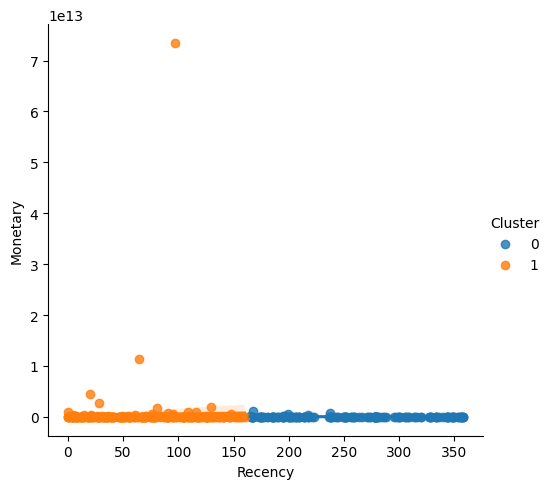

In [81]:
sns.lmplot(x='Recency', y='Monetary', data=RFMScores, hue='Cluster', fit_reg=True)

Berdasarkan grafik diatas menunjukkan korelasi recency dan monetary mereka yang masuk pada cluter 1 memiliki recency 0 - 160 sedangkan mereka yang masuk cluster 0 memiliki recency 170 - >350





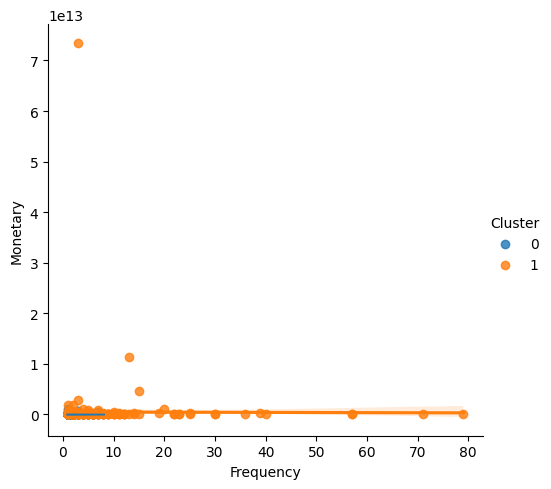

In [82]:
sns.lmplot(x='Frequency', y='Monetary', data=RFMScores, hue='Cluster')

Dari grafik korelasi frekuensi dan monetary diatas dapat dilihat mereka yang masuk cluster 0 memiliki frekuensi dan monetary yang sedikit artinya mereka tidak terlalu sering membeli dan tidak terlalu banyak yang mereka beli. Sedangkan mereka yang masuk cluster 1 cukup beragam hingga ada yang sangat sering membeli namun sedikit jumlah yang mereka beli, ada juga jumlah banyak juga yang dibeli, namun termasuk outlier

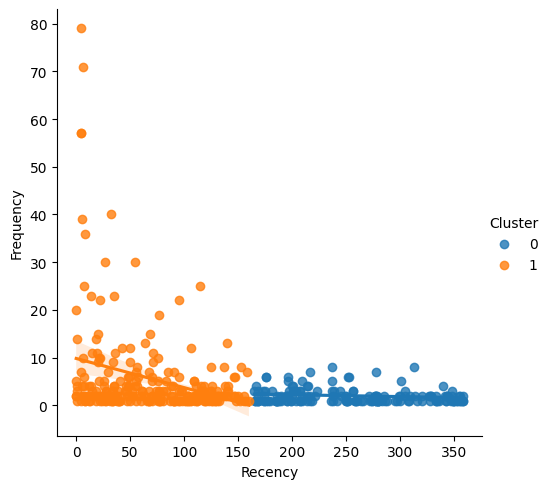

In [83]:
sns.lmplot(x='Recency', y='Frequency', data=RFMScores, hue='Cluster', fit_reg=True)


Dari grafik diatas korelasi recency dan frekuensi dapat dilihat mereka yang masuk cluster 0 yang recency >200 adalah mereka yang malas belanja. Sedangkan mereka yang masuk cluster 1 adalah yang cukup rajin belanja dengan frekuensi yang cukup tinggi.

# Result and Recomendation

Dari hasil grafik, diperoleh 2 cluster yaitu cluster 0 dan cluster 1. Jika dilihat, cluster 0 memiliki recency tinggi dengan frekusnsi dan monetary yang rendah. Artinya mereka dalam cluster 0 ini sudah lama dan jarang melakukan transaksi sehingga uang yang dikeluarkan customer untuk melakukan transaksi sedikit. Cluster 1 memiliki recency yang rendah dibanding cluster 0, frekuensi dan monetary yang tinggi dibanding cluster 0 sehingga mereka dalam cluster 1 ini masih sering dan paling sering melakukan transaksi sehingga uang yang dikeluarkan customer cukup besar. 